In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

plt.style.use('seaborn-v0_8-whitegrid')

### Original dataset

In [2]:
root_folder = '.'
data_folder = os.path.join(root_folder, 'dataset')
csv_path = os.path.join(data_folder, 'HAM10000_metadata.csv')

train_csv_path = os.path.join(data_folder, 'train.csv')
val_csv_path = os.path.join(data_folder, 'val.csv')
test_csv_path = os.path.join(data_folder, 'test.csv')

In [3]:
data_df = pd.read_csv(csv_path)
data_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
train_val, test = train_test_split(data_df, test_size=0.1, stratify=data_df["dx"], random_state=42)
train, val = train_test_split(train_val, test_size=0.2, stratify=train_val["dx"], random_state=42)

In [5]:
print(f"Original: {len(data_df)}")
print(f"Train: {len(train)}")
print(f"Val: {len(val)}")
print(f"Test: {len(test)}")

Original: 10015
Train: 7210
Val: 1803
Test: 1002


In [6]:
dx_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

data_df['diagnosis'] = data_df['dx'].map(dx_dict.get)
train['diagnosis'] = train['dx'].map(dx_dict.get)
val['diagnosis'] = val['dx'].map(dx_dict.get)
test['diagnosis'] = test['dx'].map(dx_dict.get)

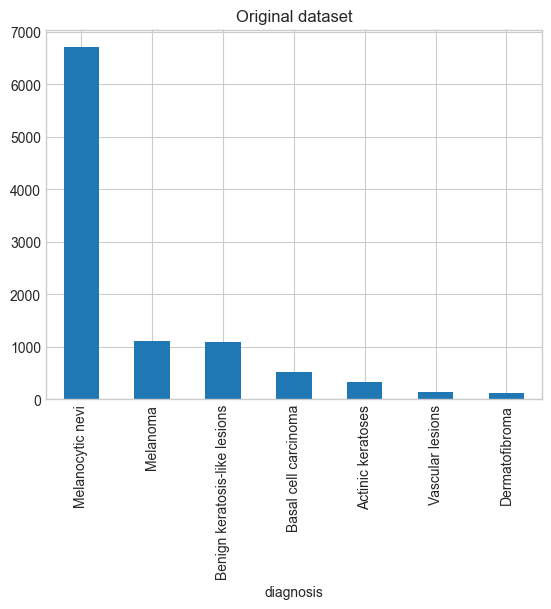

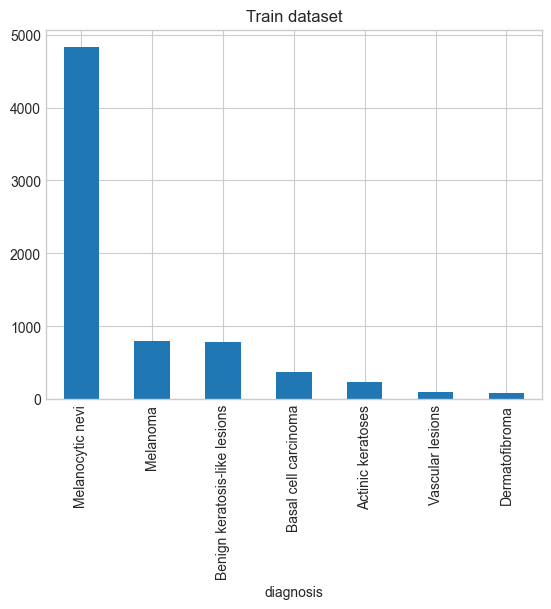

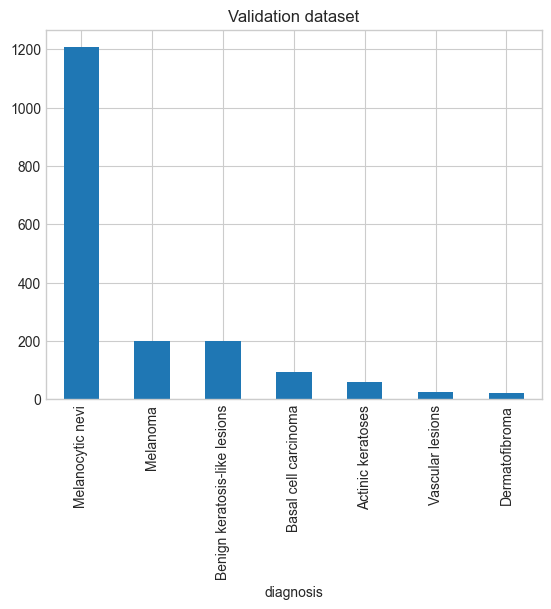

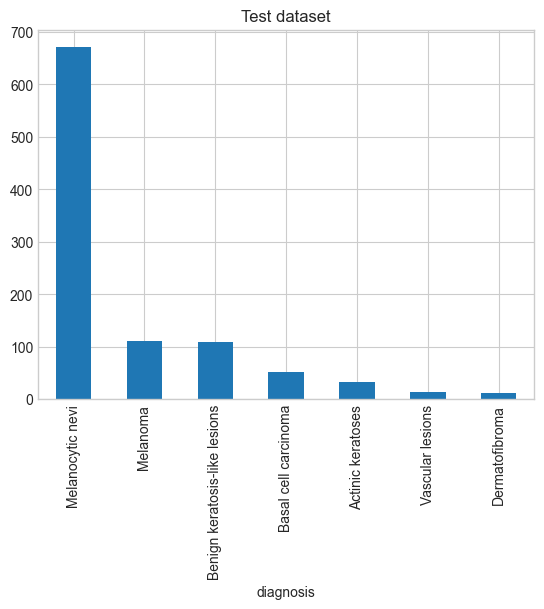

In [7]:
data_df['diagnosis'].value_counts().plot(kind='bar')
plt.title("Original dataset")
plt.show()

train['diagnosis'].value_counts().plot(kind='bar')
plt.title("Train dataset")
plt.show()

val['diagnosis'].value_counts().plot(kind='bar')
plt.title("Validation dataset")
plt.show()

test['diagnosis'].value_counts().plot(kind='bar')
plt.title("Test dataset")
plt.show()

In [8]:
train.to_csv(train_csv_path, index=False)
val.to_csv(val_csv_path, index=False)
test.to_csv(test_csv_path, index=False)

### Balanced dataset

In [8]:
root_folder = '.'
data_folder = os.path.join(root_folder, 'dataset')
augmented_csv_path = os.path.join(data_folder, 'Balanced_HAM10000_metadata.csv')

balanced_train_csv_path = os.path.join(data_folder, 'balanced_train.csv')
balanced_val_csv_path = os.path.join(data_folder, 'balanced_val.csv')
balanced_test_csv_path = os.path.join(data_folder, 'balanced_test.csv')

In [9]:
root_folder = '.'
data_folder = os.path.join(root_folder, 'dataset')
balanced_csv_path = os.path.join(data_folder, 'Balanced_HAM10000_metadata.csv')

balanced_train_csv_path = os.path.join(data_folder, 'balanced_train.csv')
balanced_val_csv_path = os.path.join(data_folder, 'balanced_val.csv')
balanced_test_csv_path = os.path.join(data_folder, 'balanced_test.csv')

In [10]:
balanced_data_df = pd.read_csv(balanced_csv_path)
balanced_data_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0003597,df_augmented_0,df,consensus,45.0,male,lower extremity
1,HAM_0003597,df_augmented_1,df,consensus,45.0,male,lower extremity
2,HAM_0003597,df_augmented_2,df,consensus,45.0,male,lower extremity
3,HAM_0003597,df_augmented_3,df,consensus,45.0,male,lower extremity
4,HAM_0003597,df_augmented_4,df,consensus,45.0,male,lower extremity


In [11]:
balanced_train_val, balanced_test = train_test_split(balanced_data_df, test_size=0.1, stratify=balanced_data_df["dx"], random_state=42)
balanced_train, balanced_val = train_test_split(balanced_train_val, test_size=0.2, stratify=balanced_train_val["dx"], random_state=42)

In [12]:
print(f"Original: {len(balanced_data_df)}")
print(f"Train: {len(balanced_train)}")
print(f"Val: {len(balanced_val)}")
print(f"Test: {len(balanced_test)}")

Original: 46935
Train: 33792
Val: 8449
Test: 4694


In [13]:
dx_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

balanced_data_df['diagnosis'] = balanced_data_df['dx'].map(dx_dict.get)
balanced_train['diagnosis'] = balanced_train['dx'].map(dx_dict.get)
balanced_val['diagnosis'] = balanced_val['dx'].map(dx_dict.get)
balanced_test['diagnosis'] = balanced_test['dx'].map(dx_dict.get)

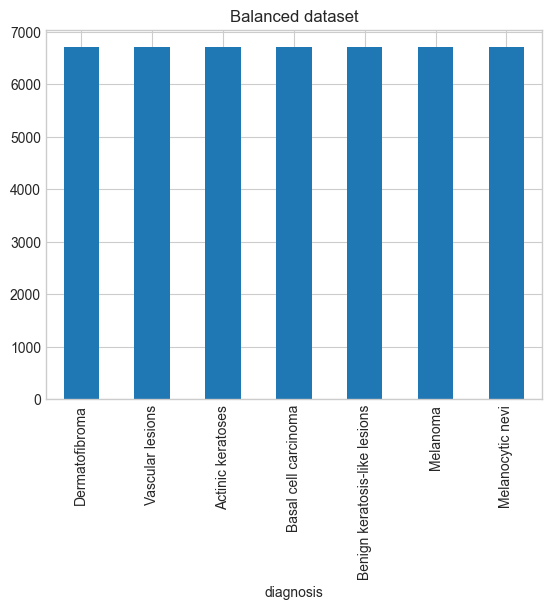

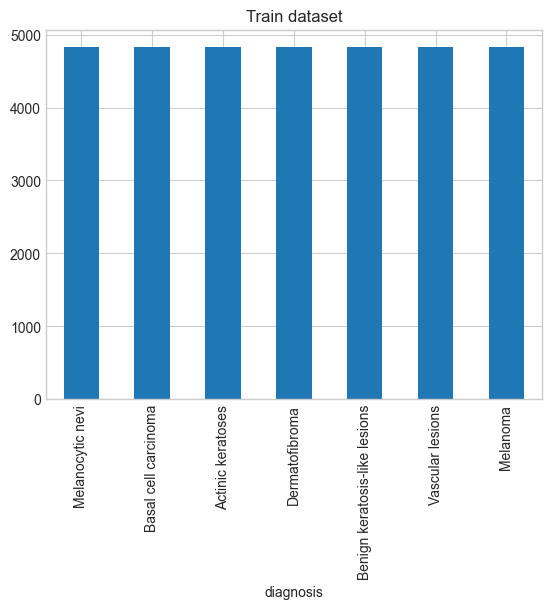

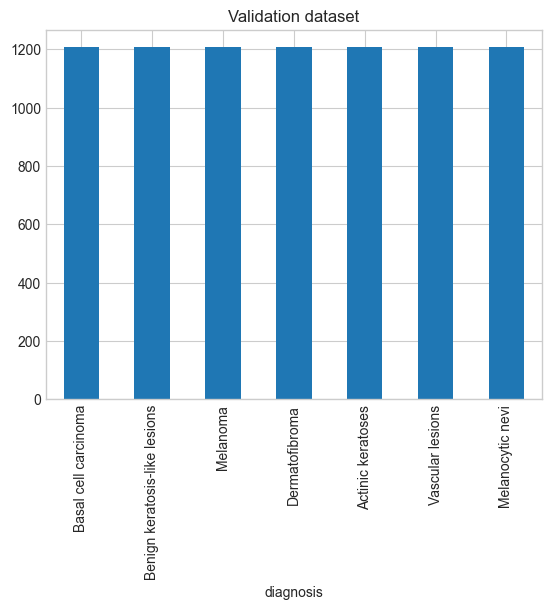

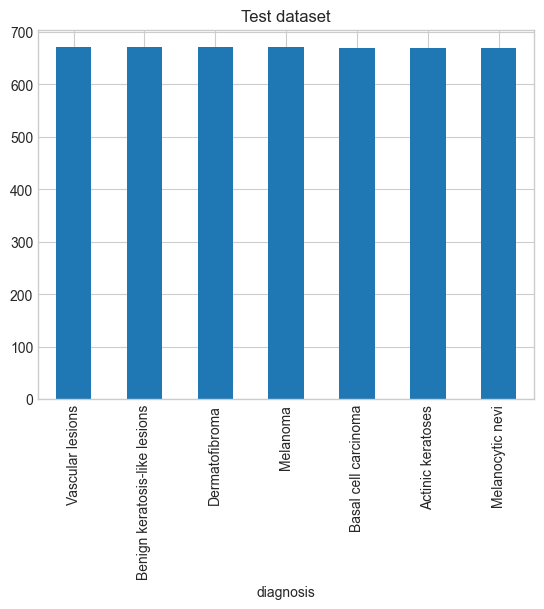

In [14]:
balanced_data_df['diagnosis'].value_counts().plot(kind='bar')
plt.title("Balanced dataset")
plt.show()

balanced_train['diagnosis'].value_counts().plot(kind='bar')
plt.title("Train dataset")
plt.show()

balanced_val['diagnosis'].value_counts().plot(kind='bar')
plt.title("Validation dataset")
plt.show()

balanced_test['diagnosis'].value_counts().plot(kind='bar')
plt.title("Test dataset")
plt.show()

In [15]:
balanced_train.to_csv(balanced_train_csv_path, index=False)
balanced_val.to_csv(balanced_val_csv_path, index=False)
balanced_test.to_csv(balanced_test_csv_path, index=False)